In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
data=pd.read_csv("D:\\Downloads\\archive\\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.shape

(21613, 21)

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
pd.set_option('display.float_format',lambda x: '%.5f' %x)

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540182.15879,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367362.23172,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [8]:
#price is a feature which is a dependent variable or y and is also our target variable
#rest are features which are independent or our x

<Axes: xlabel='bedrooms', ylabel='price'>

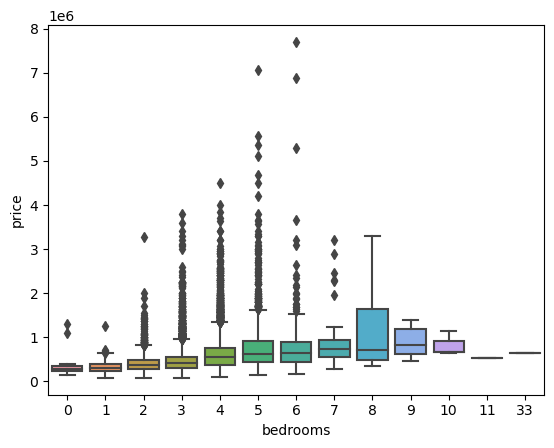

In [9]:
sns.boxplot(x='bedrooms',y='price', data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

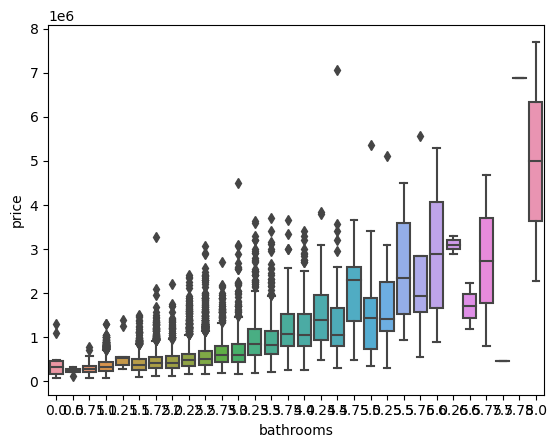

In [10]:
sns.boxplot(x='bathrooms',y='price', data=data)

C:\Users\USER\AppData\Local\Temp\ipykernel_4824\3457273139.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

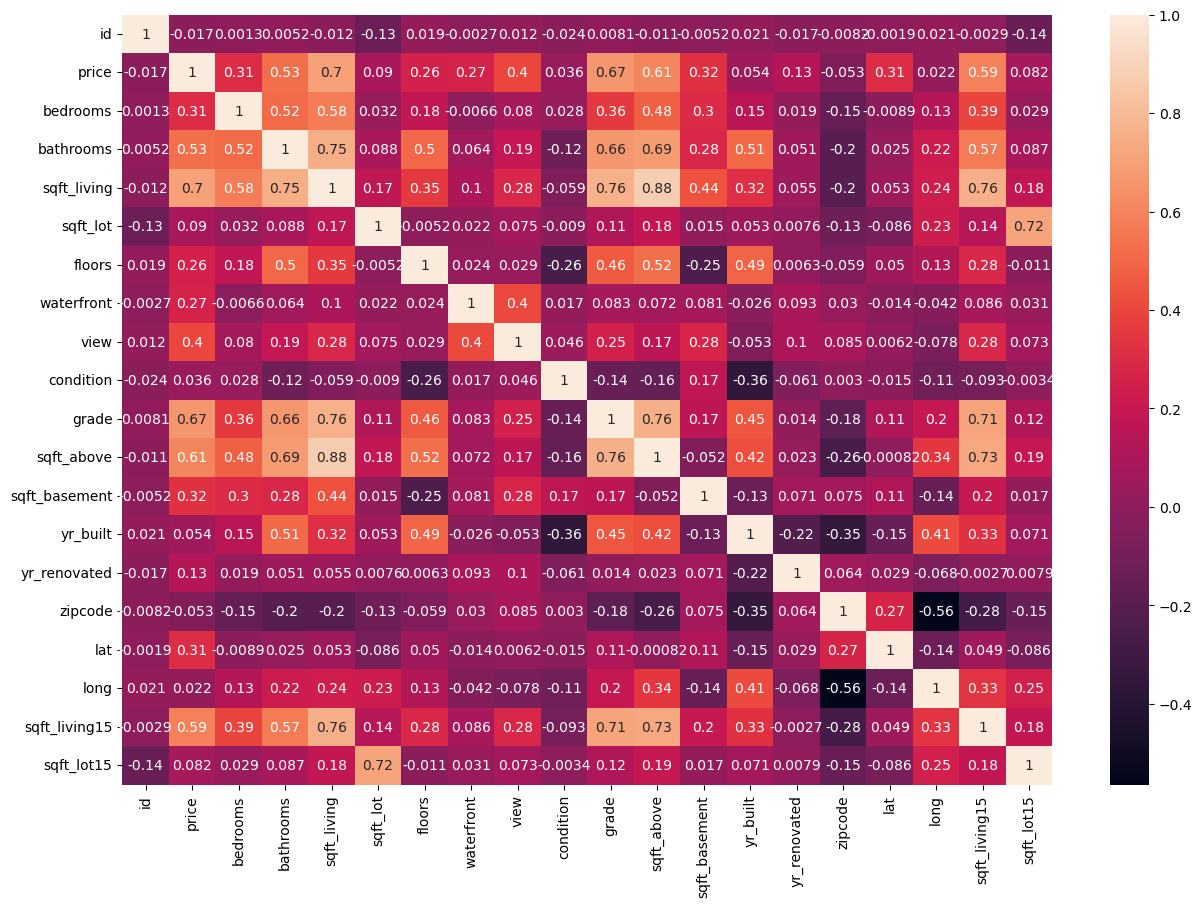

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

In [12]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 5


# splitting of data for training and testing

In [13]:
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
data.drop(columns=['id', 'date','yr_built', 'yr_renovated', 'zipcode','lat', 'long'],inplace=True)

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1340,5650
1,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1690,7639
2,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,2720,8062
3,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1360,5000
4,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1800,7503


In [16]:
X=data[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']]

In [17]:
Y=data[['price']]

In [18]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1340,5650
1,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1690,7639
2,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,2720,8062
3,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1360,5000
4,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,1530,1509
21609,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,1830,7200
21610,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,1020,2007
21611,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,1410,1287


In [19]:
Y

,price
0,221900.00000
1,538000.00000
2,180000.00000
3,604000.00000
4,510000.00000
...,...
21608,360000.00000
21609,400000.00000
21610,402101.00000
21611,400000.00000


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=101)

In [22]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
21403,4,3.25000,3080,4287,2.00000,0,0,3,10,2230,850,2250,2520
19109,6,3.75000,3190,4700,2.00000,0,0,3,8,3190,0,2680,5640
17473,3,2.50000,2330,9160,2.00000,0,0,3,9,2330,0,2460,9160
9397,2,1.00000,1460,7832,1.00000,0,0,3,6,1460,0,1460,7632
15146,3,2.25000,2210,10794,1.00000,0,0,3,7,1540,670,2230,10753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25000,1920,9672,2.00000,0,0,4,8,1920,0,1950,10125
8006,3,1.00000,1240,3600,1.50000,0,0,3,7,1240,0,1680,3600
17745,3,2.25000,1780,7332,2.00000,0,0,3,7,1780,0,1510,7625
17931,2,1.00000,1150,5000,1.00000,0,0,4,7,1050,100,1463,4320


In [23]:
 Y_train

,price
21403,830000.00000
19109,359500.00000
17473,710000.00000
9397,420000.00000
15146,245000.00000
...,...
5695,625000.00000
8006,390000.00000
17745,272450.00000
17931,552000.00000


In [24]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000,2360,19899,1.00000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,3,1.00000,1480,13280,2.50000,0,0,3,6,1480,0,1510,8723
12560,3,2.50000,2790,16173,2.00000,0,0,3,10,2790,0,2890,11632
319,4,1.00000,800,8775,1.00000,0,0,3,6,800,0,1310,8775
16682,4,1.50000,1550,5053,1.00000,0,0,4,7,1180,370,1450,5639


In [25]:
Y_test

,price
3834,349950.00000
1348,450000.00000
20366,635000.00000
16617,355500.00000
20925,246950.00000
...,...
6466,455000.00000
12560,445000.00000
319,268750.00000
16682,433000.00000


In [26]:
train_data=X_train.join(Y_train)

In [27]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
21403,4,3.25000,3080,4287,2.00000,0,0,3,10,2230,850,2250,2520,830000.00000
19109,6,3.75000,3190,4700,2.00000,0,0,3,8,3190,0,2680,5640,359500.00000
17473,3,2.50000,2330,9160,2.00000,0,0,3,9,2330,0,2460,9160,710000.00000
9397,2,1.00000,1460,7832,1.00000,0,0,3,6,1460,0,1460,7632,420000.00000
15146,3,2.25000,2210,10794,1.00000,0,0,3,7,1540,670,2230,10753,245000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25000,1920,9672,2.00000,0,0,4,8,1920,0,1950,10125,625000.00000
8006,3,1.00000,1240,3600,1.50000,0,0,3,7,1240,0,1680,3600,390000.00000
17745,3,2.25000,1780,7332,2.00000,0,0,3,7,1780,0,1510,7625,272450.00000
17931,2,1.00000,1150,5000,1.00000,0,0,4,7,1050,100,1463,4320,552000.00000


In [28]:
train_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
bedrooms,1.00000,0.51347,0.57331,0.02322,0.16808,-0.00754,0.07778,0.02258,0.35074,0.47235,0.30442,0.38637,0.02141,0.30620
bathrooms,0.51347,1.00000,0.75329,0.08315,0.49689,0.06261,0.18528,-0.12712,0.66182,0.68217,0.28563,0.56608,0.08216,0.51952
sqft_living,0.57331,0.75329,1.00000,0.16604,0.35038,0.10405,0.28344,-0.05956,0.75955,0.87498,0.43605,0.75391,0.17861,0.69920
sqft_lot,0.02322,0.08315,0.16604,1.00000,-0.00847,0.02312,0.07683,-0.00910,0.11160,0.17584,0.01560,0.13871,0.72436,0.08674
floors,0.16808,0.49689,0.35038,-0.00847,1.00000,0.02511,0.02944,-0.26373,0.45487,0.52150,-0.24671,0.27737,-0.01440,0.25450
waterfront,-0.00754,0.06261,0.10405,0.02312,0.02511,1.00000,0.40357,0.01871,0.09021,0.07387,0.07727,0.09004,0.03173,0.26623
view,0.07778,0.18528,0.28344,0.07683,0.02944,0.40357,1.00000,0.04347,0.25212,0.16631,0.27544,0.28119,0.07237,0.39550
condition,0.02258,-0.12712,-0.05956,-0.00910,-0.26373,0.01871,0.04347,1.00000,-0.14522,-0.15915,0.17298,-0.08789,-0.00344,0.04149
grade,0.35074,0.66182,0.75955,0.11160,0.45487,0.09021,0.25212,-0.14522,1.00000,0.75189,0.16894,0.71100,0.11821,0.66660
sqft_above,0.47235,0.68217,0.87498,0.17584,0.52150,0.07387,0.16631,-0.15915,0.75189,1.00000,-0.05416,0.72909,0.18772,0.60180


<Axes: >

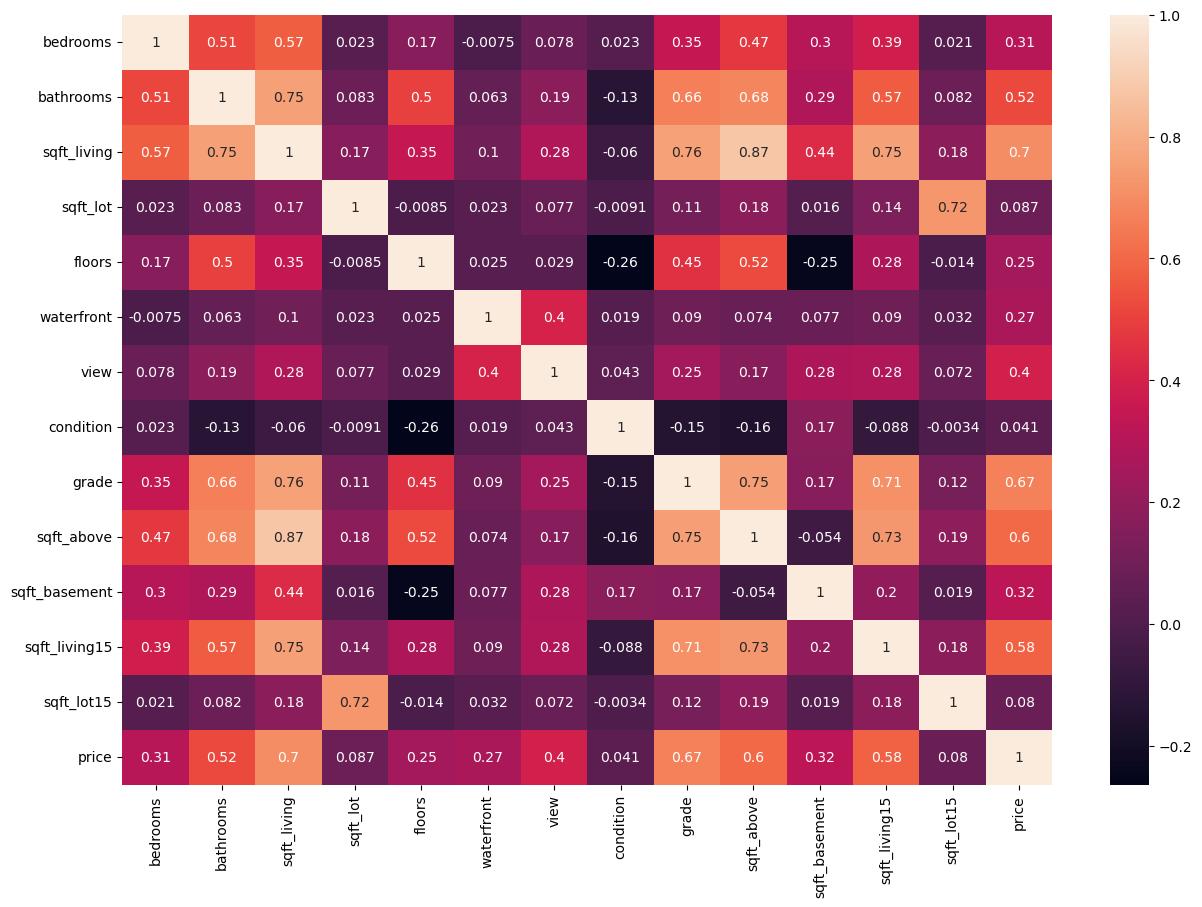

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'sqft_living15'}>],
       [<Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

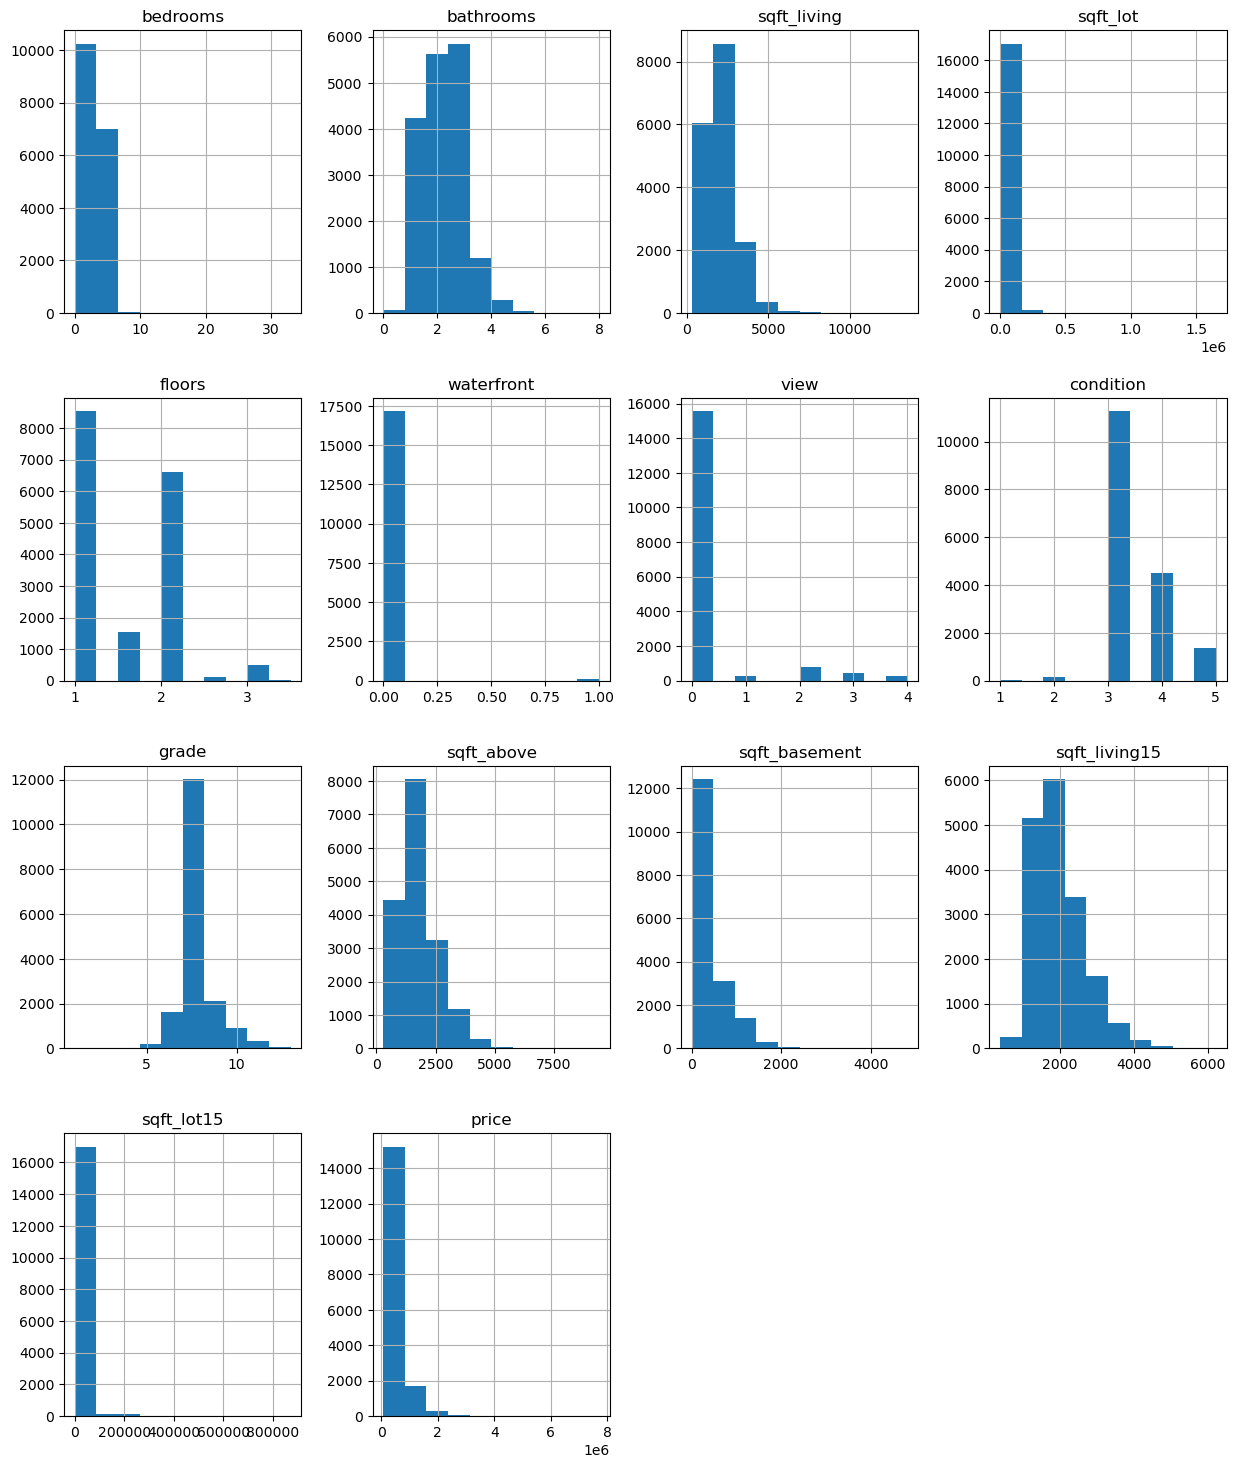

In [30]:
train_data.hist(figsize=(15,18))

In [31]:
train_data['bedrooms'] = np.log(train_data['bedrooms']+1)
train_data['sqft_lot'] = np.log(train_data['sqft_lot']+1)
train_data['sqft_above'] = np.log(train_data['sqft_above']+1)
train_data['sqft_living'] = np.log(train_data['sqft_living']+1)
train_data['bathrooms'] = np.log(train_data['bathrooms']+1)
train_data['waterfront'] = np.log(train_data['waterfront']+1)
train_data['view'] = np.log(train_data['view']+1)
train_data['floors'] = np.log(train_data['floors']+1)
train_data['price'] = np.log(train_data['price']+1)
train_data['condition'] = np.log(train_data['condition']+1)
train_data['sqft_lot15'] = np.log(train_data['sqft_lot15']+1)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'sqft_living15'}>],
       [<Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

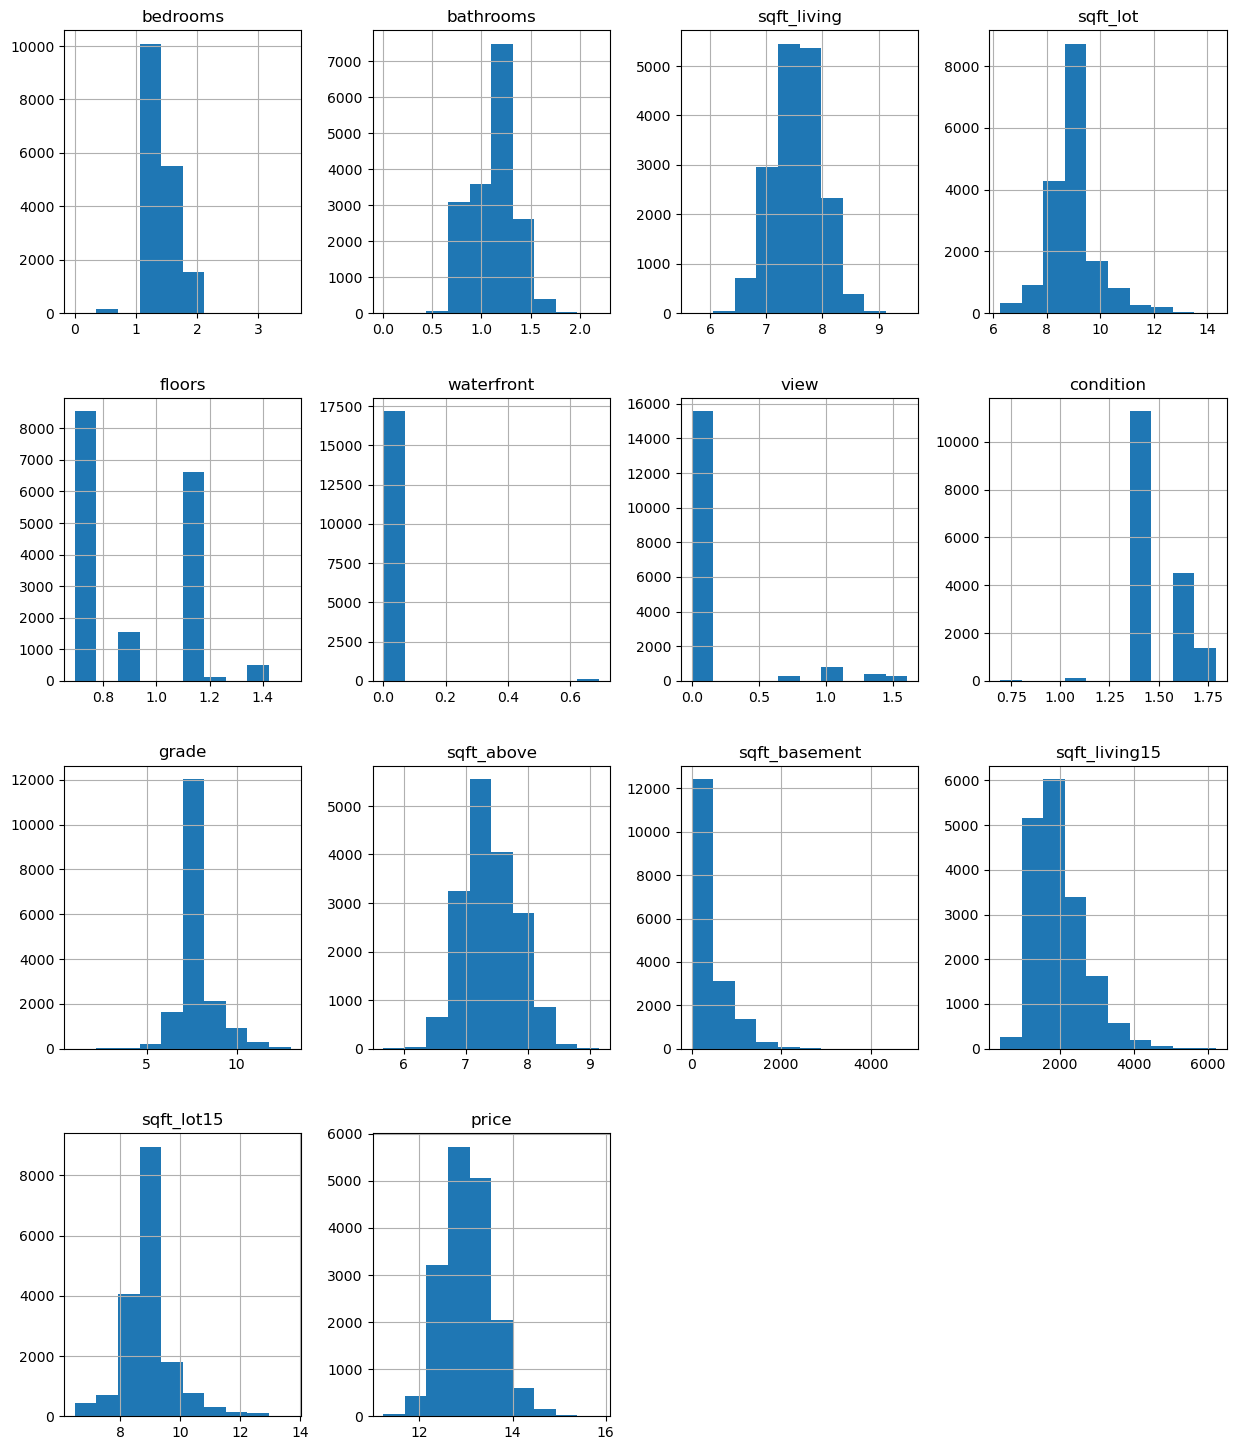

In [32]:
train_data.hist(figsize=(15,18))

<Axes: >

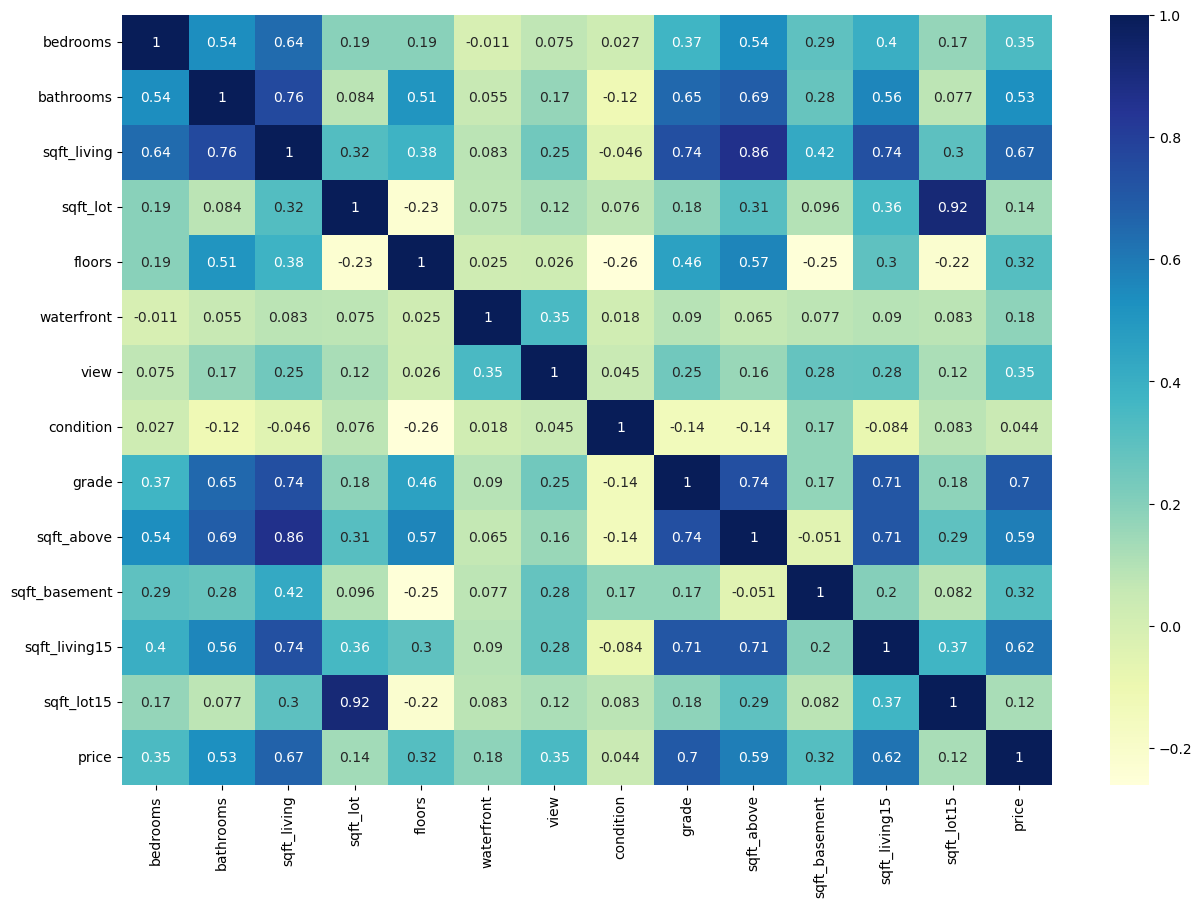

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# NORMALIZATION

In [34]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [35]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [36]:
X_train_std

array([[ 0.66846376,  1.46854591,  1.09261277, ...,  1.25726309,
         0.385879  , -0.37107455],
       [ 2.80226572,  2.11708195,  1.21288881, ..., -0.65955516,
         1.0164459 , -0.25673309],
       [-0.39843723,  0.49574185,  0.27254884, ..., -0.65955516,
         0.69383028, -0.12773246],
       ...,
       [-0.39843723,  0.17147383, -0.32883137, ..., -0.65955516,
        -0.69928263, -0.183987  ],
       [-1.46533821, -1.44986627, -1.01768507, ..., -0.43404713,
        -0.76820506, -0.30510832],
       [-0.39843723, -1.44986627, -0.6896595 , ...,  0.01696892,
        -1.38850691, -0.17977249]])

In [37]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
21403,4,3.25000,3080,4287,2.00000,0,0,3,10,2230,850,2250,2520
19109,6,3.75000,3190,4700,2.00000,0,0,3,8,3190,0,2680,5640
17473,3,2.50000,2330,9160,2.00000,0,0,3,9,2330,0,2460,9160
9397,2,1.00000,1460,7832,1.00000,0,0,3,6,1460,0,1460,7632
15146,3,2.25000,2210,10794,1.00000,0,0,3,7,1540,670,2230,10753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3,2.25000,1920,9672,2.00000,0,0,4,8,1920,0,1950,10125
8006,3,1.00000,1240,3600,1.50000,0,0,3,7,1240,0,1680,3600
17745,3,2.25000,1780,7332,2.00000,0,0,3,7,1780,0,1510,7625
17931,2,1.00000,1150,5000,1.00000,0,0,4,7,1050,100,1463,4320


In [38]:
X_test_std

array([[-1.46533821, -1.44986627, -1.12702693, ..., -0.65955516,
        -0.56730351, -0.11102102],
       [ 0.66846376,  0.17147383, -0.04454255, ...,  0.78369623,
        -0.14203747, -0.14898825],
       [ 0.66846376,  0.49574185,  0.45843   , ..., -0.65955516,
        -0.74327567, -0.30584128],
       ...,
       [ 0.66846376, -1.44986627, -1.40038157, ..., -0.65955516,
        -0.99256956, -0.14184191],
       [ 0.66846376, -0.80133023, -0.58031765, ...,  0.17482455,
        -0.78726871, -0.25676973],
       [-0.39843723, -1.44986627, -1.35664483, ..., -0.65955516,
        -1.43249995, -0.24353984]])

In [39]:
Y_train

,price
21403,830000.00000
19109,359500.00000
17473,710000.00000
9397,420000.00000
15146,245000.00000
...,...
5695,625000.00000
8006,390000.00000
17745,272450.00000
17931,552000.00000


In [40]:
Y_test

,price
3834,349950.00000
1348,450000.00000
20366,635000.00000
16617,355500.00000
20925,246950.00000
...,...
6466,455000.00000
12560,445000.00000
319,268750.00000
16682,433000.00000


# MODEL TRAINING

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [56]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(X_test_std)

In [59]:
y_pred

array([[351681.87390826],
       [516677.52309576],
       [574626.03513161],
       ...,
       [ 78874.02415273],
       [382855.94816812],
       [ 14928.67599786]])

In [60]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000,2360,19899,1.00000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,3,1.00000,1480,13280,2.50000,0,0,3,6,1480,0,1510,8723
12560,3,2.50000,2790,16173,2.00000,0,0,3,10,2790,0,2890,11632
319,4,1.00000,800,8775,1.00000,0,0,3,6,800,0,1310,8775
16682,4,1.50000,1550,5053,1.00000,0,0,4,7,1180,370,1450,5639


In [46]:
Y_test

,price
3834,349950.00000
1348,450000.00000
20366,635000.00000
16617,355500.00000
20925,246950.00000
...,...
6466,455000.00000
12560,445000.00000
319,268750.00000
16682,433000.00000


In [61]:
y_pred

array([[351681.87390826],
       [516677.52309576],
       [574626.03513161],
       ...,
       [ 78874.02415273],
       [382855.94816812],
       [ 14928.67599786]])

In [62]:
from sklearn.metrics import mean_absolute_error,r2_score

In [63]:
mean_absolute_error(Y_test,y_pred)

149571.72270471568

In [70]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000,2360,19899,1.00000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,3,1.00000,1480,13280,2.50000,0,0,3,6,1480,0,1510,8723
12560,3,2.50000,2790,16173,2.00000,0,0,3,10,2790,0,2890,11632
319,4,1.00000,800,8775,1.00000,0,0,3,6,800,0,1310,8775
16682,4,1.50000,1550,5053,1.00000,0,0,4,7,1180,370,1450,5639


In [71]:
X_test.loc[3834]

bedrooms           2.00000
bathrooms          1.00000
sqft_living     1050.00000
sqft_lot        6317.00000
floors             1.50000
waterfront         0.00000
view               0.00000
condition          4.00000
grade              7.00000
sqft_above      1050.00000
sqft_basement      0.00000
sqft_living15   1600.00000
sqft_lot15      9616.00000
Name: 3834, dtype: float64

In [77]:
r2_score(Y_test,y_pred)

0.6160946903140864

# LETS PREDICT THE PRICE FOR A SINGLE HOUSE 

In [78]:
new_house=[[2.00000,1.00000,1050.00000,6317.00000,1.50000,0.00000,0.00000,4.00000,7.00000,1050.00000,0.00000,1600.00000,9616.00000]]

In [79]:
new_house_std=std.transform(new_house)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
new_house_std

array([[-1.46533821, -1.44986627, -1.12702693, -0.20897093,  0.00964114,
        -0.08904033, -0.30976385,  0.91235785, -0.5600271 , -0.89568369,
        -0.65955516, -0.56730351, -0.11102102]])

In [81]:
int(lr.predict(new_house_std))

351648